In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '35768dec-6b4d-436f-846e-115127885a19',
}

session = Session()
session.headers.update(headers)

try: 
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


  

{'status': {'timestamp': '2024-07-10T05:20:30.454Z', 'error_code': 0, 'error_message': None, 'elapsed': 515, 'credit_count': 1, 'notice': None, 'total_count': 9984}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11595, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:

df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971980e+07,1.971980e+07,False,NaN,1,NaN,NaN,None,2024-07-10T05:18:00.000Z,59139.545719,2.887432e+10,-18.8168,0.785762,3.146142,-2.829766,-15.000276,-2.827056,-16.231602,1.166220e+12,53.8574,1.241930e+12,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202073e+08,1.202073e+08,True,NaN,2,NaN,NaN,None,2024-07-10T05:18:00.000Z,3111.494166,1.495725e+10,-28.7461,0.691513,1.331523,-7.332643,-15.604993,6.666014,-12.750234,3.740243e+11,17.2586,3.740243e+11,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,91222,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122598e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-10T05:18:00.000Z,1.000269,5.152394e+10,-24.2413,0.019599,0.030012,0.180130,0.056499,0.053997,0.025795,1.122900e+11,5.1837,1.161081e+11,None,2024-07-10T05:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475826e+08,1.475826e+08,False,NaN,4,NaN,NaN,None,2024-07-10T05:18:00.000Z,523.284650,1.601680e+09,-21.5045,0.445730,1.765969,-7.585840,-21.534632,-10.439521,-14.602419,7.722769e+10,3.5651,7.722769e+10,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.636759e+08,5.798366e+08,True,NaN,5,NaN,NaN,None,2024-07-10T05:18:00.000Z,144.943292,2.359275e+09,-31.1765,1.051519,2.712346,-2.554500,-9.389587,-0.240475,-16.535046,6.720671e+10,3.1025,8.404343e+10,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USDC,USDC,usd-coin,20885,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.400820e+10,3.400820e+10,False,NaN,6,NaN,NaN,None,2024-07-10T05:18:00.000Z,1.000143,5.545343e+09,-25.8270,0.010995,0.010606,0.023244,0.024983,0.011296,0.012846,3.401306e+10,1.5695,3.401306e+10,None,2024-07-10T05:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,False,NaN,7,NaN,NaN,None,2024-07-10T05:19:00.000Z,0.440140,1.016265e+09,-23.9751,0.477269,1.421673,-8.219620,-11.738649,-12.775280,-28.912402,2.452597e+10,1.1322,4.401403e+10,None,2024-07-10T05:19:00.000Z,NaN,NaN,NaN,NaN,NaN
7,11419,Toncoin,TON,toncoin,453,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506197e+09,5.108785e+09,True,NaN,8,3.414167e+09,2.528723e+10,None,2024-07-10T05:18:00.000Z,7.406561,2.455915e+08,-34.2968,0.411567,2.404733,-6.800329,3.923892,8.218443,-0.979147,1.856230e+10,0.8572,3.783852e+10,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.450536e+11,1.450536e+11,True,NaN,9,NaN,NaN,None,2024-07-10T05:19:00.000Z,0.109639,5.734065e+08,-34.4325,0.926686,1.417630,-9.757772,-24.718591,-24.147897,-44.196158,1.590351e+10,0.7342,1.590351e+10,None,2024-07-1

In [4]:
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.971980e+07,1.971980e+07,False,NaN,1,NaN,NaN,None,2024-07-10T05:18:00.000Z,59139.545719,2.887432e+10,-18.8168,0.785762,3.146142,-2.829766,-15.000276,-2.827056,-16.231602,1.166220e+12,53.8574,1.241930e+12,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:50:47.725928
1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202073e+08,1.202073e+08,True,NaN,2,NaN,NaN,None,2024-07-10T05:18:00.000Z,3111.494166,1.495725e+10,-28.7461,0.691513,1.331523,-7.332643,-15.604993,6.666014,-12.750234,3.740243e+11,17.2586,3.740243e+11,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:50:47.725928
2,825,Tether USDt,USDT,tether,91222,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122598e+11,1.160769e+11,True,NaN,3,NaN,NaN,None,2024-07-10T05:18:00.000Z,1.000269,5.152394e+10,-24.2413,0.019599,0.030012,0.180130,0.056499,0.053997,0.025795,1.122900e+11,5.1837,1.161081e+11,None,2024-07-10T05:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-10 10:50:47.725928
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475826e+08,1.475826e+08,False,NaN,4,NaN,NaN,None,2024-07-10T05:18:00.000Z,523.284650,1.601680e+09,-21.5045,0.445730,1.765969,-7.585840,-21.534632,-10.439521,-14.602419,7.722769e+10,3.5651,7.722769e+10,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:50:47.725928
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.636759e+08,5.798366e+08,True,NaN,5,NaN,NaN,None,2024-07-10T05:18:00.000Z,144.943292,2.359275e+09,-31.1765,1.051519,2.712346,-2.554500,-9.389587,-0.240475,-16.535046,6.720671e+10,3.1025,8.404343e+10,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:50:47.725928
5,3408,USDC,USDC,usd-coin,20885,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.400820e+10,3.400820e+10,False,NaN,6,NaN,NaN,None,2024-07-10T05:18:00.000Z,1.000143,5.545343e+09,-25.8270,0.010995,0.010606,0.023244,0.024983,0.011296,0.012846,3.401306e+10,1.5695,3.401306e+10,None,2024-07-10T05:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-10 10:50:47.725928
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.572306e+10,9.998747e+10,False,NaN,7,NaN,NaN,None,2024-07-10T05:19:00.000Z,0.440140,1.016265e+09,-23.9751,0.477269,1.421673,-8.219620,-11.738649,-12.775280,-28.912402,2.452597e+10,1.1322,4.401403e+10,None,2024-07-10T05:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:50:47.725928
7,11419,Toncoin,TON,toncoin,453,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.506197e+09,5.108785e+09,True,NaN,8,3.414167e+09,2.528723e+10,None,2024-07-10T05:18:00.000Z,7.406561,2.455915e+08,-34.2968,0.411567,2.404733,-6.800329,3.923892,8.218443,-0.979147,1.856230e+10,0.8572,3.783852e+10,None,2024-07-10T05:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:50:47.725928
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange,

In [2]:
## changing limit in API pull code to check the database clearly

In [30]:
def Api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'20',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '35768dec-6b4d-436f-846e-115127885a19',
    }

    session = Session()
    session.headers.update(headers)

    try: 
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    ## automating csv file of data 
    if not os.path.isfile(r'C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Python nd ML\crypto.csv'):
        df.to_csv(r'C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Python nd ML\crypto.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Python nd ML\crypto.csv', mode='a', header = False)
   ##'a' standa for append   

  

In [31]:
import os
from time import time
from time import sleep

for i in range(333): ##333 is the max time i can pull api from this website in a day
    Api_runner()
    print('Api runner completed successfully.')
    sleep(60) #sleep for 1 minute
exit()


Api runner completed successfully.
Api runner completed successfully.


KeyboardInterrupt: 

In [39]:
df5 = pd.read_csv(r'C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Python nd ML\crypto.csv')
df5

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19719800.00000,19719800.00000,False,NaN,1,NaN,NaN,NaN,2024-07-10T06:10:00.000Z,58967.57013,28826094458.80718,-18.91730,-0.45483,2.66125,-3.41919,-15.15148,-3.23887,-16.63994,1162828689376.72070,53.83150,1238318972652.41992,NaN,2024-07-10T06:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 11:41:54.838867
1,1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120207304.75119,120207304.75119,True,NaN,2,NaN,NaN,NaN,2024-07-10T06:09:00.000Z,3096.98541,14981341933.24652,-28.45460,-0.74853,0.54316,-7.96403,-15.83980,6.04366,-13.25606,372280269480.79102,17.23970,372280269480.78998,NaN,2024-07-10T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 11:41:54.838867
2,2,825,Tether USDt,USDT,tether,91223,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112259808785.14278,116076856616.98984,True,NaN,3,NaN,NaN,NaN,2024-07-10T06:09:00.000Z,1.00034,51555812113.03668,-24.16120,0.01910,0.02882,0.18328,0.05305,0.05987,0.02347,112297851774.75130,5.20070,116116193140.88000,NaN,2024-07-10T06:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-10 11:41:54.838867
3,3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147582556.48109,147582556.48109,False,NaN,4,NaN,NaN,NaN,2024-07-10T06:09:00.000Z,522.46224,1597310541.70942,-20.30170,-0.36521,1.72528,-7.74930,-21.32027,-10.83563,-14.39407,77106312465.45395,3.57090,77106312465.45000,NaN,2024-07-10T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 11:41:54.838867
4,4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,463675708.61111,579836504.16766,True,NaN,5,NaN,NaN,NaN,2024-07-10T06:09:00.000Z,144.06183,2345338542.90051,-31.93550,-0.99602,1.84098,-3.49433,-9.76727,-0.96604,-17.36224,66797970625.10020,3.09350,83532307285.99001,NaN,2024-07-10T06:09:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 11:41:54.838867
5,5,3408,USDC,USDC,usd-coin,20886,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,34017145371.42967,34017145371.42967,False,NaN,6,NaN,NaN,NaN,2024-07-10T06:09:00.000Z,1.00014,5556322166.36257,-25.84430,0.01632,0.01759,0.02221,0.00697,0.01251,0.00606,34022060581.13772,1.57550,34022060581.14000,NaN,2024-07-10T06:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-10 11:41:54.838867
6,6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55723063839.00000,99987471767.00000,False,NaN,7,NaN,NaN,NaN,2024-07-10T06:10:00.000Z,0.43744,1016316732.04565,-23.35730,-0.76590,0.40023,-8.84446,-12.04210,-13.41823,-29.07155,24375666154.28409,1.12890,43744303480.35000,NaN,2024-07-10T06:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 11:41:54.838867
7,7,11419,Toncoin,TON,toncoin,453,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2506201805.49728,5108789406.65609,True,NaN,8,3414166606.00000,25210081797.38140,NaN,2024-07-10T06:09:00.000Z,7.38396,246240985.47145,-33.80160,-0.27522,1.92470,-7.65777,3.96235,6.18405,-3.28447,18505702799.12441,0.85670,3772311480

In [33]:
## changing scientific format of e numerical values
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [45]:
## Data cleaning
df5.info()
df5.isnull().sum()
df5.drop(['Unnamed: 0','platform','tvl_ratio'], axis= 1, inplace= True)
df5.fillna('', inplace= True)

In [46]:
df5

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19719800.00000,19719800.00000,False,1,,,2024-07-10T06:10:00.000Z,58967.57013,28826094458.80718,-18.91730,-0.45483,2.66125,-3.41919,-15.15148,-3.23887,-16.63994,1162828689376.72070,53.83150,1238318972652.41992,,2024-07-10T06:10:00.000Z,,,,,,2024-07-10 11:41:54.838867
1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",,120207304.75119,120207304.75119,True,2,,,2024-07-10T06:09:00.000Z,3096.98541,14981341933.24652,-28.45460,-0.74853,0.54316,-7.96403,-15.83980,6.04366,-13.25606,372280269480.79102,17.23970,372280269480.78998,,2024-07-10T06:09:00.000Z,,,,,,2024-07-10 11:41:54.838867
2,825,Tether USDt,USDT,tether,91223,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",,112259808785.14278,116076856616.98984,True,3,,,2024-07-10T06:09:00.000Z,1.00034,51555812113.03668,-24.16120,0.01910,0.02882,0.18328,0.05305,0.05987,0.02347,112297851774.75130,5.20070,116116193140.88000,,2024-07-10T06:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-10 11:41:54.838867
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",,147582556.48109,147582556.48109,False,4,,,2024-07-10T06:09:00.000Z,522.46224,1597310541.70942,-20.30170,-0.36521,1.72528,-7.74930,-21.32027,-10.83563,-14.39407,77106312465.45395,3.57090,77106312465.45000,,2024-07-10T06:09:00.000Z,,,,,,2024-07-10 11:41:54.838867
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",,463675708.61111,579836504.16766,True,5,,,2024-07-10T06:09:00.000Z,144.06183,2345338542.90051,-31.93550,-0.99602,1.84098,-3.49433,-9.76727,-0.96604,-17.36224,66797970625.10020,3.09350,83532307285.99001,,2024-07-10T06:09:00.000Z,,,,,,2024-07-10 11:41:54.838867
5,3408,USDC,USDC,usd-coin,20886,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",,34017145371.42967,34017145371.42967,False,6,,,2024-07-10T06:09:00.000Z,1.00014,5556322166.36257,-25.84430,0.01632,0.01759,0.02221,0.00697,0.01251,0.00606,34022060581.13772,1.57550,34022060581.14000,,2024-07-10T06:09:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-10 11:41:54.838867
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55723063839.00000,99987471767.00000,False,7,,,2024-07-10T06:10:00.000Z,0.43744,1016316732.04565,-23.35730,-0.76590,0.40023,-8.84446,-12.04210,-13.41823,-29.07155,24375666154.28409,1.12890,43744303480.35000,,2024-07-10T06:10:00.000Z,,,,,,2024-07-10 11:41:54.838867
7,11419,Toncoin,TON,toncoin,453,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",,2506201805.49728,5108789406.65609,True,8,3414166606.00000,25210081797.38140,2024-07-10T06:09:00.000Z,7.38396,246240985.47145,-33.80160,-0.27522,1.92470,-7.65777,3.96235,6.18405,-3.28447,18505702799.12441,0.85670,37723114800.86000,,2024-07-10T06:09:00.000Z,,,,,,2024-07-10 11:41:54.838867
8,74,Dogecoin,DOGE,dogecoin,1021,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",,145054186383.70523,145054186383.70523,True,9,,,2024-07-10T06:10:00.000Z,0.10913,575395774

In [132]:
##visualization
import matplotlib.pyplot as plt
import seaborn as sbs

df5.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'cmc_rank', 'self_reported_circulating_supply',
       'self_reported_market_cap', 'last_updated', 'quote.USD.price',
       'quote.USD.volume_24h', 'quote.USD.volume_change_24h',
       'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d',
       'quote.USD.market_cap', 'quote.USD.market_cap_dominance',
       'quote.USD.fully_diluted_market_cap', 'quote.USD.tvl',
       'quote.USD.last_updated', 'platform.id', 'platform.name',
       'platform.symbol', 'platform.slug', 'platform.token_address',
       'timestamp'],
      dtype='object')

In [49]:
df5.columns.get_loc('quote.USD.percent_change_1h')


18

In [50]:
df5.columns.get_loc('quote.USD.percent_change_90d')

23

In [86]:
df6 = df5[[ 'name','quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']]

In [87]:
df6.set_index('name', inplace= True)


In [90]:
df7 = df6.transpose()

<Axes: >

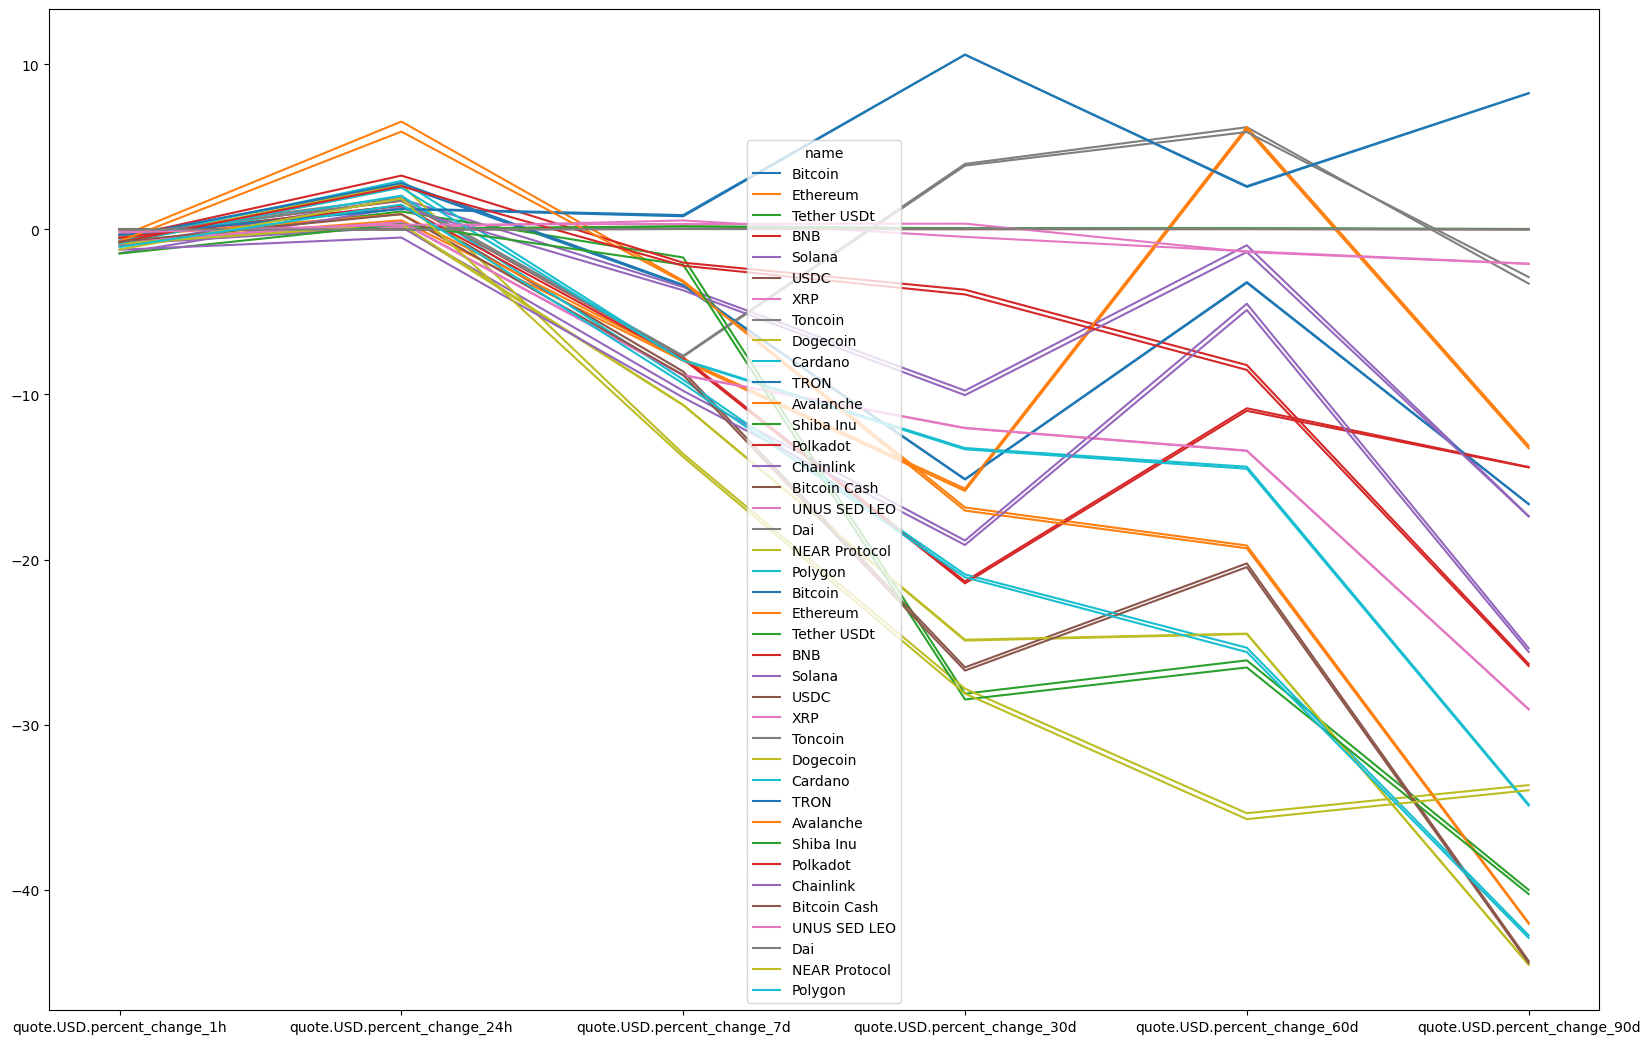

In [91]:
df7.plot(figsize= (20,13))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

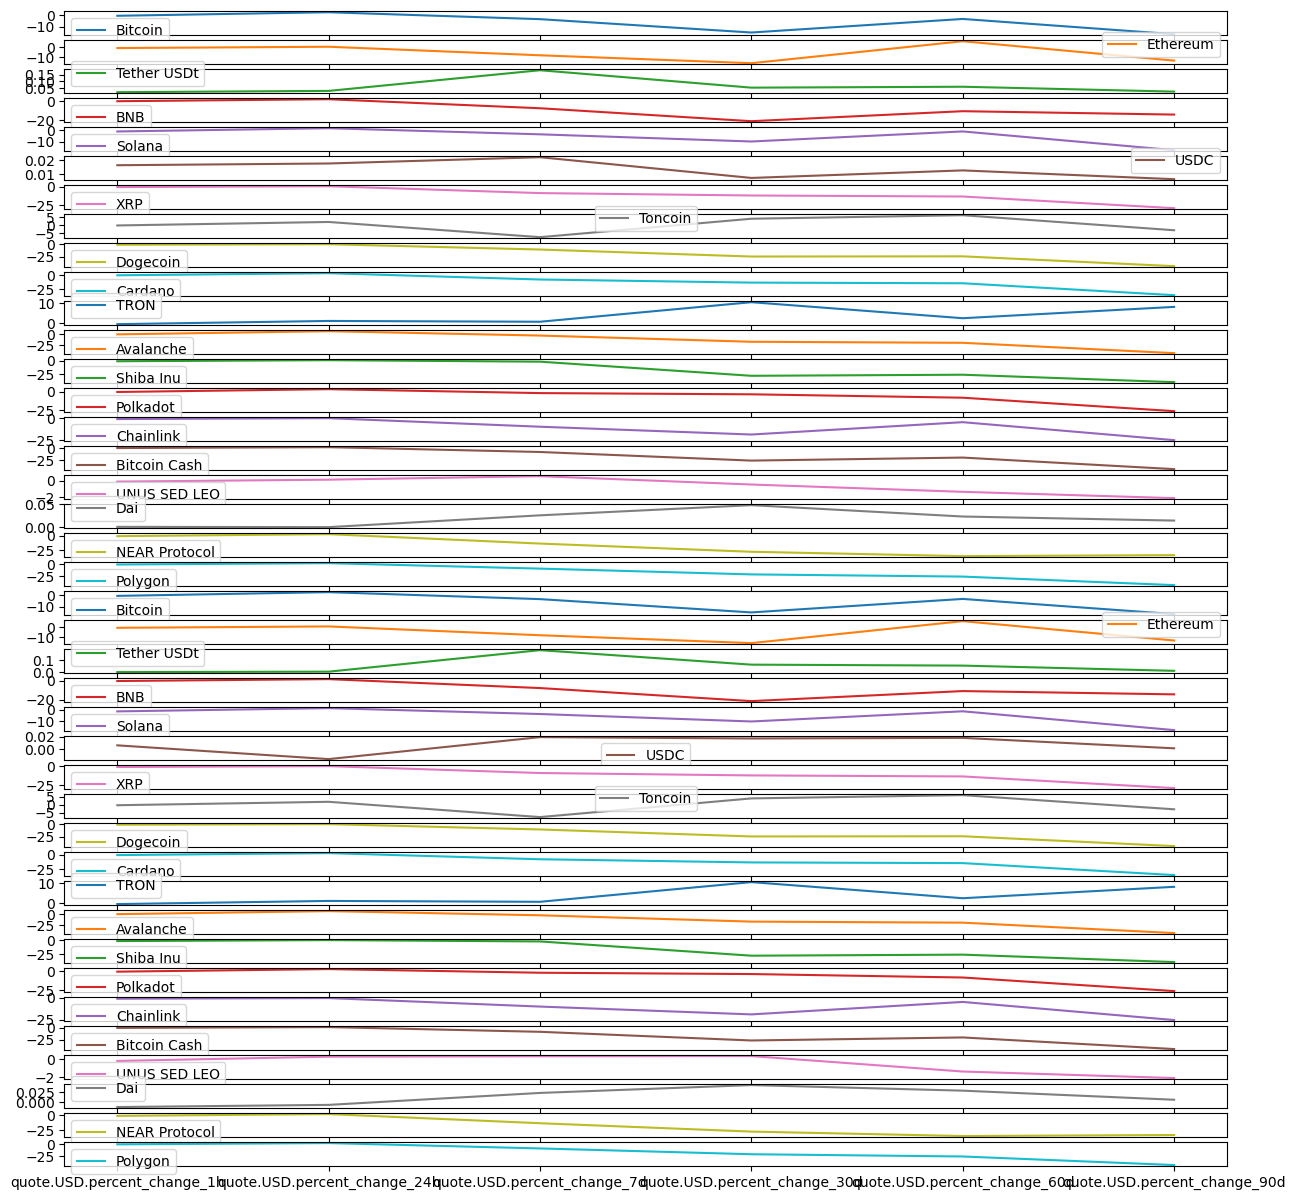

In [101]:
df7.plot(figsize= (15,15), subplots= True)

<Axes: >

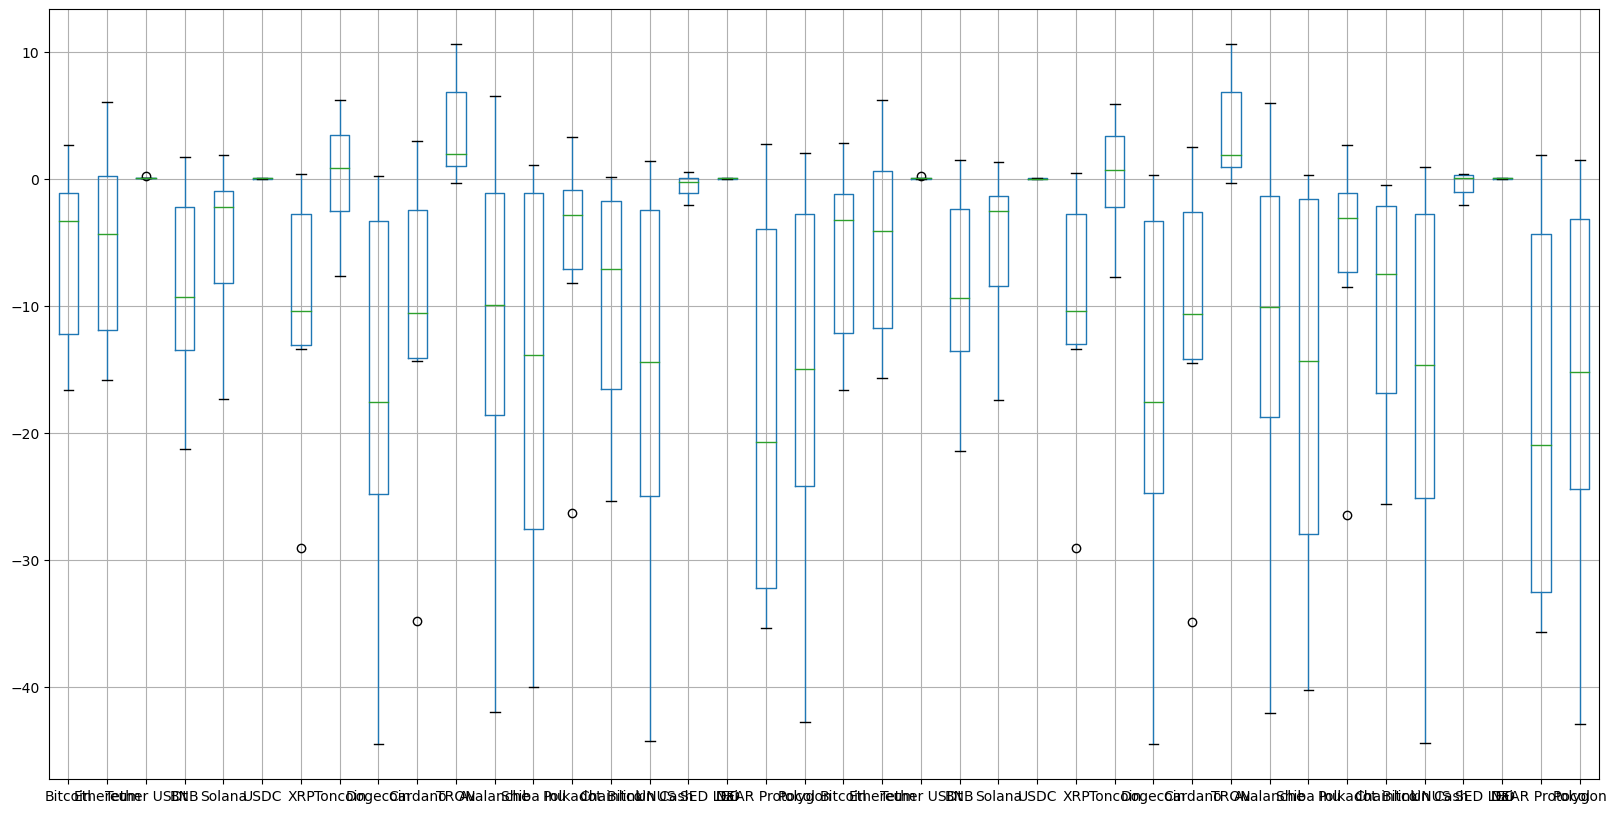

In [96]:
df7.boxplot(figsize=(20,10))

In [103]:
df8 = df5.groupby('name', sort= False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']]
## this alone won't change the dataset
df8

In [105]:
df9 = df5.groupby('name', sort= False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
       'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
       'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df9
## now as we append the dataframe there will be man rows with same name and additional data that's why
## it's necessary to form a dataframe that will have unique bitcooins name

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.47784,2.73010,-3.39195,-15.13939,-3.21540,-16.63658
Ethereum,-0.59380,0.73345,-7.90975,-15.77281,6.12136,-13.18198
Tether USDt,0.01035,0.01697,0.18055,0.05726,0.05684,0.01771
BNB,-0.44141,1.58415,-7.80218,-21.38043,-10.91242,-14.40628
Solana,-1.22241,1.58029,-3.59423,-9.90342,-1.17020,-17.37655
USDC,0.01106,0.00054,0.02066,0.01195,0.01521,0.00351
XRP,-0.75256,0.42118,-8.83380,-12.03370,-13.40836,-29.06206
Toncoin,-0.32086,1.83958,-7.68497,3.91032,6.03791,-3.08683
Dogecoin,-0.88173,0.25716,-10.64034,-24.87932,-24.49311,-44.52663


In [109]:
df10 = df9.stack()
df10

name                                       
Bitcoin        quote.USD.percent_change_1h     -0.47784
               quote.USD.percent_change_24h     2.73010
               quote.USD.percent_change_7d     -3.39195
               quote.USD.percent_change_30d   -15.13939
               quote.USD.percent_change_60d    -3.21540
               quote.USD.percent_change_90d   -16.63658
Ethereum       quote.USD.percent_change_1h     -0.59380
               quote.USD.percent_change_24h     0.73345
               quote.USD.percent_change_7d     -7.90975
               quote.USD.percent_change_30d   -15.77281
               quote.USD.percent_change_60d     6.12136
               quote.USD.percent_change_90d   -13.18198
Tether USDt    quote.USD.percent_change_1h      0.01035
               quote.USD.percent_change_24h     0.01697
               quote.USD.percent_change_7d      0.18055
               quote.USD.percent_change_30d     0.05726
               quote.USD.percent_change_60d     0.05684
    

In [110]:
type(df9)

pandas.core.frame.DataFrame

In [111]:
type(df10)

pandas.core.series.Series

In [125]:
## need to change df10 to dataframe 
df11 = df10.to_frame(name = 'values')
df11

values
name                                                
Bitcoin       quote.USD.percent_change_1h   -0.47784
              quote.USD.percent_change_24h   2.73010
              quote.USD.percent_change_7d   -3.39195
              quote.USD.percent_change_30d -15.13939
              quote.USD.percent_change_60d  -3.21540
              quote.USD.percent_change_90d -16.63658
Ethereum      quote.USD.percent_change_1h   -0.59380
              quote.USD.percent_change_24h   0.73345
              quote.USD.percent_change_7d   -7.90975
              quote.USD.percent_change_30d -15.77281
              quote.USD.percent_change_60d   6.12136
              quote.USD.percent_change_90d -13.18198
Tether USDt   quote.USD.percent_change_1h    0.01035
              quote.USD.percent_change_24h   0.01697
              quote.USD.percent_change_7d    0.18055
              quote.USD.percent_change_30d   0.05726
              quote.USD.percent_change_60d   0.05684
              quote.USD.percent_change_90d   0.01771
BNB           quote.USD.percent_change_1h   -0.44141
              quote.USD.percent_change_24h   1.58415
              quote.USD.percent_change_7d   -7.80218
              quote.USD.percent_change_30d -21.38043
              quote.USD.percent_change_60d -10.91242
              quote.USD.percent_change_90d -14.40628
Solana        quote.USD.percent_change_1h   -1.22241
              quote.USD.percent_change_24h   1.58029
              quote.USD.percent_change_7d   -3.59423
              quote.USD.percent_change_30d  -9.90342
              quote.USD.percent_change_60d  -1.17020
              quote.USD.percent_change_90d -17.37655
USDC          quote.USD.percent_change_1h    0.01106
              quote.USD.percent_change_24h   0.00054
              quote.USD.percent_change_7d    0.02066
              quote.USD.percent_change_30d   0.01195
              quote.USD.percent_change_60d   0.01521
              quote.USD.percent_change_90d   0.00351
XRP           quote.USD.percent_change_1h   -0.75256
              quote.USD.percent_change_24h   0.42118
              quote.USD.percent_change_7d   -8.83380
              quote.USD.percent_change_30d -12.03370
              quote.USD.percent_change_60d -13.40836
              quote.USD.percent_change_90d -29.06206
Toncoin       quote.USD.percent_change_1h   -0.32086
              quote.USD.percent_change_24h   1.83958
              quote.USD.percent_change_7d   -7.68497
              quote.USD.percent_change_30d   3.91032
              quote.USD.percent_change_60d   6.03791
              quote.USD.percent_change_90d  -3.08683
Dogecoin      quote.USD.percent_change_1h   -0.88173
              quote.USD.percent_change_24h   0.25716
              quote.USD.percent_change_7d  -10.64034
              quote.USD.percent_change_30d -24.87932
              quote.USD.percent_change_60d -24.49311
              quote.USD.percent_change_90d -44.52663
Cardano       quote.USD.percent_change_1h   -0.75392
              quote.USD.percent_change_24h   2.72627
              quote.USD.percent_change_7d   -7.92421
              quote.USD.percent_change_30d -13.28423
              quote.USD.percent_change_60d -14.43734
              quote.USD.percent_change_90d -34.85938
TRON          quote.USD.percent_change_1h   -0.34063
              quote.USD.percent_change_24h   1.24021
              quote.USD.percent_change_7d    0.82559
              quote.USD.percent_change_30d  10.57738
              quote.USD.percent_change_60d   2.59078
              quote.USD.percent_change_90d   8.24049
Avalanche     quote.USD.percent_change_1h   -0.59018
              quote.USD.percent_change_24h   6.22214
              quote.USD.percent_change_7d   -3.15896
              quote.USD.percent_change_30d -16.93811
              quote.USD.percent_change_60d -19.23110
              quote.USD.percent_change_90d -42.02073
Shiba Inu     quote.USD.percent_change_1h   -1.17907
              quote.USD.percent_change_24h   0.70098
              quot

In [126]:
## removing bitcoins name from index 
index = pd.Index(range(120)) ## 120 is number of rows
df12 = df11.set_index(index)
df12


,values
0,-0.47784
1,2.73010
2,-3.39195
3,-15.13939
4,-3.21540
5,-16.63658
6,-0.59380
7,0.73345
8,-7.90975
9,-15.77281


In [128]:
df12 = df11.reset_index()
df12

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47784
1,Bitcoin,quote.USD.percent_change_24h,2.73010
2,Bitcoin,quote.USD.percent_change_7d,-3.39195
3,Bitcoin,quote.USD.percent_change_30d,-15.13939
4,Bitcoin,quote.USD.percent_change_60d,-3.21540
5,Bitcoin,quote.USD.percent_change_90d,-16.63658
6,Ethereum,quote.USD.percent_change_1h,-0.59380
7,Ethereum,quote.USD.percent_change_24h,0.73345
8,Ethereum,quote.USD.percent_change_7d,-7.90975
9,Ethereum,quote.USD.percent_change_30d,-15.77281


In [114]:
df11.count()

values    120
dtype: int64

In [131]:
df12.rename(columns= {'level_1': 'percentchange_over_time'}, inplace= True )
df12

,name,percentchange_over_time,values
0,Bitcoin,quote.USD.percent_change_1h,-0.47784
1,Bitcoin,quote.USD.percent_change_24h,2.73010
2,Bitcoin,quote.USD.percent_change_7d,-3.39195
3,Bitcoin,quote.USD.percent_change_30d,-15.13939
4,Bitcoin,quote.USD.percent_change_60d,-3.21540
5,Bitcoin,quote.USD.percent_change_90d,-16.63658
6,Ethereum,quote.USD.percent_change_1h,-0.59380
7,Ethereum,quote.USD.percent_change_24h,0.73345
8,Ethereum,quote.USD.percent_change_7d,-7.90975
9,Ethereum,quote.USD.percent_change_30d,-15.77281


In [139]:
df12['percentchange_over_time'] = df12['percentchange_over_time'].str.replace('quote.USD.percent_change_', '')
df12

,name,percentchange_over_time,values
0,Bitcoin,1h,-0.47784
1,Bitcoin,24h,2.73010
2,Bitcoin,7d,-3.39195
3,Bitcoin,30d,-15.13939
4,Bitcoin,60d,-3.21540
5,Bitcoin,90d,-16.63658
6,Ethereum,1h,-0.59380
7,Ethereum,24h,0.73345
8,Ethereum,7d,-7.90975
9,Ethereum,30d,-15.77281


In [1]:
sbs.boxplot(x = 'percentchange_over_time', y='values', hue='name', data = df12, kind = 'point')

NameError: name 'sbs' is not defined